In [13]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

geolocation = pd.read_csv('D:/UTD/SEM-2/Big Data/geolocation.csv')
trucks = pd.read_csv('D:/UTD/SEM-2/Big Data/trucks.csv')
trucks_mg = pd.read_csv('D:/UTD/SEM-2/Big Data/trucks_mg.csv')
riskfactor = pd.read_csv('D:/UTD/SEM-2/Big Data/riskfactor.csv')
drivermileage = pd.read_csv('D:/UTD/SEM-2/Big Data/drivermileage.csv')
truck_mileage = pd.read_csv('D:/UTD/SEM-2/Big Data/truck_mileage.csv')
avg_mileage = pd.read_csv('D:/UTD/SEM-2/Big Data/avg_mileage.csv')

In [14]:
average_gas_yearly = pd.DataFrame(index=trucks.index)


average_gas_yearly['driverid'] = trucks['driverid'].copy()

years = ['09', '10', '11', '12', '13']

for year in years:
   
    selected_columns = trucks.filter(regex=f'{year}_gas$').columns


    average_gas_yearly[f'avg_{year}_gas'] = trucks[selected_columns].mean(axis=1)

In [15]:

avg_miles_yearly = pd.DataFrame(index=trucks.index)

avg_miles_yearly['driverid'] = trucks['driverid'].copy()
years = ['09', '10', '11', '12', '13']

for year in years:
    
    selected_columns = trucks.filter(regex=f'{year}_miles$').columns

    
    avg_miles_yearly[f'avg_{year}_miles'] = trucks[selected_columns].mean(axis=1)

In [16]:
avg_miles_yearly

,driverid,avg_09_miles,avg_10_miles,avg_11_miles,avg_12_miles,avg_13_miles
0,A1,12534.166667,11599.750000,11603.750000,11434.583333,10406.666667
1,A2,12447.666667,11702.916667,11720.500000,12800.750000,13413.500000
2,A3,11129.583333,13048.333333,11588.250000,11754.083333,11556.833333
3,A4,13202.833333,12189.416667,11810.083333,12262.166667,11619.166667
4,A5,12044.666667,12392.166667,12845.750000,12894.083333,12409.000000
...,...,...,...,...,...,...
95,A96,12160.583333,11425.166667,11393.000000,12354.000000,12049.000000
96,A97,11490.333333,10961.916667,11925.500000,12278.250000,11887.833333
97,A98,12031.916667,11776.416667,11490.250000,11764.916667,11650.500000
98,A99,11678.333333,11834.166667,11665.333333,12312.083333,11820.166667


In [17]:
murthy_df = pd.merge(geolocation, trucks, on="driverid", how='inner', suffixes=('', '_trucks'))

In [22]:


murthy_df = pd.merge(murthy_df, trucks_mg, on="driverid", how='inner', suffixes=('', '_trucks_mg'))
murthy_df



,truckid,driverid,event,latitude,longitude,city,state,velocity,event_ind,idling_ind,...,mar09_gas,feb09_miles,feb09_gas,jan09_miles,jan09_gas,truckid_trucks_mg,model_trucks_mg,Date,Miles,Gas
0,A54,A54,normal,38.440467,-122.714431,Santa Rosa,California,17,0,0,...,2224,9655,2224,9731,2224,A54,Western Star,15/06/2015,14969,2760
1,A54,A54,normal,35.373292,-119.018712,Bakersfield,California,19,0,0,...,2224,9655,2224,9731,2224,A54,Western Star,15/06/2015,14969,2760
2,A54,A54,normal,39.230151,-121.136075,Rough and Ready,California,45,0,0,...,2224,9655,2224,9731,2224,A54,Western Star,15/06/2015,14969,2760
3,A54,A54,normal,34.953034,-120.435719,Santa Maria,California,21,0,0,...,2224,9655,2224,9731,2224,A54,Western Star,15/06/2015,14969,2760
4,A54,A54,normal,37.962146,-122.345526,San Pablo,California,53,0,0,...,2224,9655,2224,9731,2224,A54,Western Star,15/06/2015,14969,2760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,A42,A42,normal,38.799703,-121.720574,Knights Landing,California,0,0,1,...,2896,15231,2896,12488,2896,A42,Volvo,15/06/2015,9734,1989
7996,A42,A42,normal,38.440467,-122.714431,Santa Rosa,California,52,0,0,...,2896,15231,2896,12488,2896,A42,Volvo,15/06/2015,9734,1989
7997,A42,A42,normal,38.440467,-122.714431,Santa Rosa,California,0,0,1,...,2896,15231,2896,12488,2896,A42,Volvo,15/06/2015,9734,1989
7998,A42,A42,normal,39.230151,-121.136075,Rough and Ready,California,57,0,0,...,2896,15231,2896,12488,2896,A42,Volvo,15/06/2015,9734,1989


In [24]:
murthy_df = pd.merge(murthy_df, riskfactor, on="driverid", how='inner', suffixes=('', '_riskfactor'))


In [25]:
murthy_df = pd.merge(murthy_df, drivermileage, on="driverid", how='inner', suffixes=('', '_drivermileage'))


In [26]:
murthy_df = pd.merge(murthy_df, truck_mileage, on="driverid", how='inner', suffixes=('', '_truck_mileage'))


In [27]:
murthy_df = pd.merge(murthy_df, avg_mileage, on="truckid", how='inner', suffixes=('', '_truck_mileage'))

In [28]:
print(riskfactor.columns)

Index(['driverid', 'events', 'totmiles', 'riskfactor'], dtype='object')


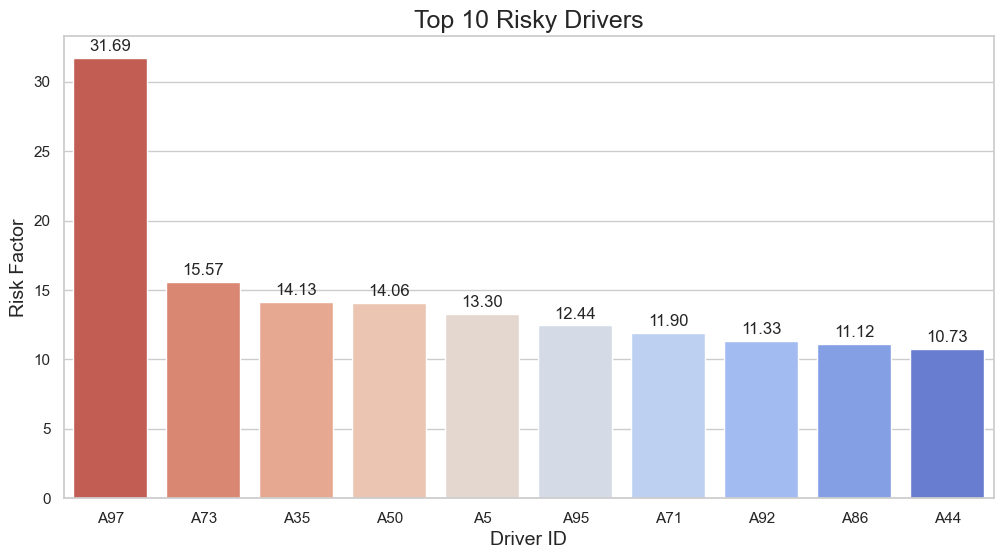

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

N = 10


driver_risk = murthy_df.groupby('driverid')['riskfactor'].mean().reset_index()


top_risky_drivers = driver_risk.nlargest(N, 'riskfactor')
plt.figure(figsize=(12, 6))


colors = sns.color_palette("coolwarm_r", n_colors=N)

barplot = sns.barplot(x='driverid', y='riskfactor', data=top_risky_drivers, palette=colors)
plt.title('Top {} Risky Drivers'.format(N), fontsize=18)
plt.xlabel('Driver ID', fontsize=14)
plt.ylabel('Risk Factor', fontsize=14)


for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='baseline',
                     size=12,
                     xytext=(0, 5),
                     textcoords='offset points')

plt.show()

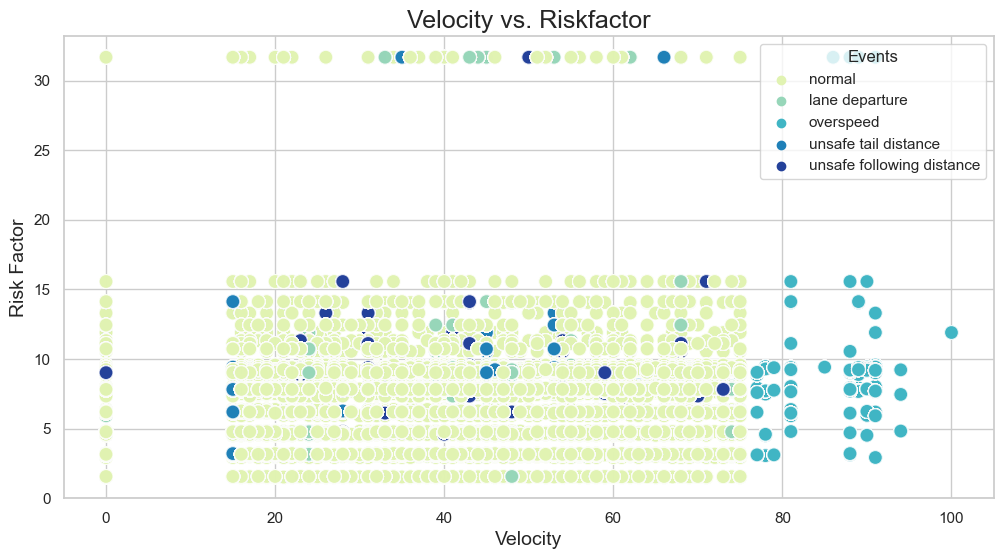

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")


plt.figure(figsize=(12, 6))
scatterplot = sns.scatterplot(x='velocity', y='riskfactor', hue='event', palette='YlGnBu', data=murthy_df, edgecolor='w', s=100, alpha=0.7)
plt.title('Velocity vs. Riskfactor', fontsize=18)
plt.xlabel('Velocity', fontsize=14)
plt.ylabel('Risk Factor', fontsize=14)


legend = scatterplot.legend_
legend.set_title('Events')
for t, l in zip(legend.texts, legend.get_lines()):
    t.set_text(l.get_label())

plt.show()


In [31]:
model_df = pd.merge(geolocation, trucks_mg, on='driverid', how='inner', suffixes=('', '_trucks_mg'))
model_df = pd.merge(model_df, riskfactor, on='driverid', how='inner', suffixes=('', '_riskfactor'))
model_df = pd.merge(model_df, drivermileage, on='driverid', how='inner', suffixes=('', '_drivermileage'))
model_df = pd.merge(model_df, truck_mileage, on='driverid', how='inner', suffixes=('', '_truck_mileage'))
model_df = pd.merge(model_df, avg_mileage, on='truckid', how='inner', suffixes=('', '_truck_mileage'))
import pandas as pd

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


df = model_df.drop(['truckid', 'driverid', 'event',], axis=1)


numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns


categorical_columns = df.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])


scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


X = df.drop(['riskfactor'], axis=1)
y = df['riskfactor']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,latitude,longitude,city,state,velocity,event_ind,idling_ind,truckid_trucks_mg,model,Date,...,Gas,events,totmiles,totmiles_drivermileage,truckid_truck_mileage,rdate,miles,gas,mpg,avgmpg
127149,0.754298,-0.193705,19,0,-0.403860,-0.245729,-0.547393,27,3,9,...,0.289033,0.548826,0.517459,0.517459,27,11,1.175615,0.580670,0.285608,-0.750774
137163,0.141484,-0.219974,36,0,1.606656,-0.245729,-0.547393,51,0,7,...,0.809721,-0.640965,0.518507,0.518507,51,40,-0.257258,-0.861567,0.586054,-0.698906
48163,-1.403133,0.007113,48,0,-1.409118,-0.245729,1.826841,44,4,4,...,-1.463872,1.738617,1.978419,1.978419,44,50,0.147839,-0.208433,0.223134,0.239482
167193,-1.185877,0.088284,1,0,-0.725542,-0.245729,-0.547393,26,0,8,...,0.479874,-0.244368,0.265398,0.265398,26,35,1.609686,1.056560,0.187211,1.116833
378515,-0.792116,-0.025691,4,0,1.405605,-0.245729,-0.547393,33,5,3,...,-0.017254,0.548826,1.050565,1.050565,33,16,1.230830,1.381914,-0.321043,-1.232278


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


regressor = LinearRegression()
regressor.fit(X_train, y_train)


y_pred = regressor.predict(X_test)


from sklearn.metrics import r2_score, mean_squared_error

r2_score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

rmse = mean_squared_error(y_test, y_pred, squared=False)
reg = LinearRegression().fit(X_train, y_train)


print("Coefficients:", reg.coef_)

print("R-squared score:", r2_score)
print("Mean squared error:", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


Coefficients: [ 7.16927223e-05 -2.28262931e-04 -2.29501264e-06  1.70382540e+05
  2.12128481e-04 -3.02035670e-04  8.58596511e-05  2.79914803e+08
 -1.17387664e-03 -8.60986470e-04  5.03787053e-03 -1.45625420e-03
  9.95922368e-01 -1.56469863e+05  1.56469822e+05 -2.79914803e+08
  9.48922259e-06 -1.17561992e-02  1.35641840e-02  1.33694788e-02
 -2.14799472e-03]
R-squared score: 0.999582127832146
Mean squared error: 0.00041856309040806515
Mean Absolute Error (MAE): 0.013414527872341219
Root Mean Squared Error (RMSE): 0.020458814491755507


In [54]:
X1_train = X_train.drop('events', axis=1)


127149    0.513759
137163   -0.648392
48163     1.568093
167193   -0.252414
378515    0.487012
Name: riskfactor, dtype: float64

In [55]:
from sklearn.ensemble import RandomForestRegressor

# Train the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=120, random_state=42)
rf_model.fit(X1_train, y_train)

RandomForestRegressor(n_estimators=120, random_state=42)

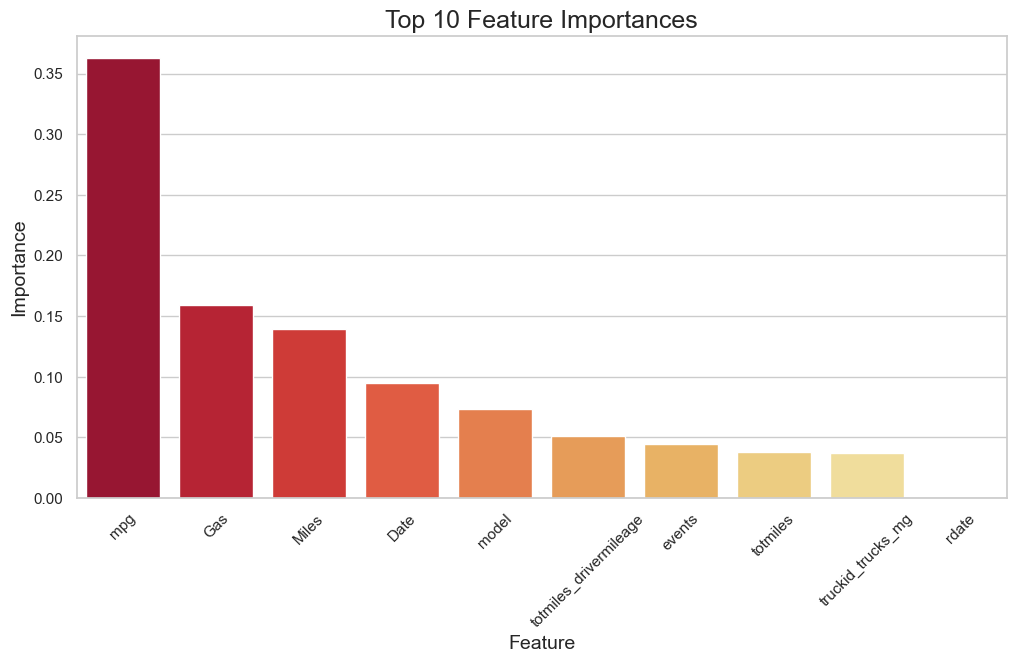

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate feature importances and indices
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Number of features to display
top_n = 10

# Extract the top N feature importances and their indices
top_importances = importances[indices][:top_n]
top_features = X.columns[indices][:top_n]

# Plot the top N feature importances in a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_features, y=top_importances, palette='YlOrRd_r')
plt.title('Top {} Feature Importances'.format(top_n), fontsize=18)
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.xticks(rotation=45)

plt.show()